In [ ]:
%load_ext autoreload
%reload_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Standard imports
import os

# Third party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Local imports
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.set()

# Load Data
- Loading the Iris Flower Dataset using scikit-learn

In [ ]:
data = datasets.load_iris()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
data['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# What problem are we trying to solve?
- We are trying to use the attributes of flowers to predict the species
- Using the sepal length and width and the petal length and width to predict the time
- Since there are 3 different kinds of flowers in the dataset, it will be a multiclass classification problem

In [ ]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])

In [ ]:
df['target'] = data['target']

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Descriptive Stats

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Distributions of featues and target

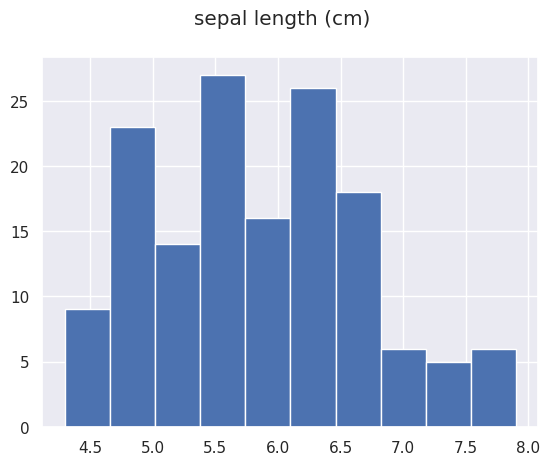

In [ ]:
col = 'sepal length (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

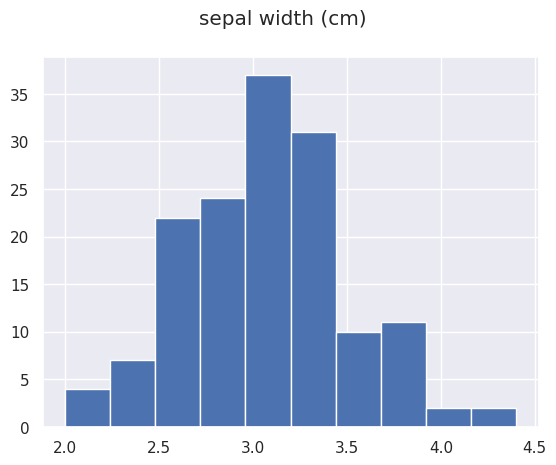

In [ ]:
col = 'sepal width (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

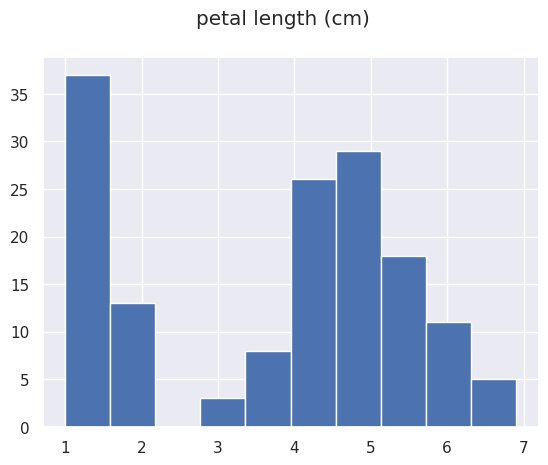

In [ ]:
col = 'petal length (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

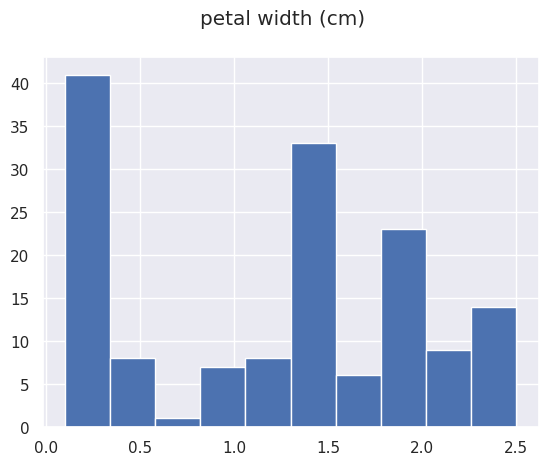

In [ ]:
col = 'petal width (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

# Relationship of the data features with the target

In [ ]:
df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

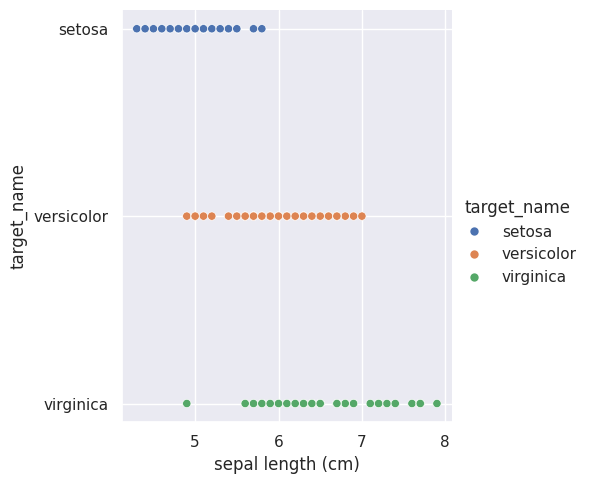

In [ ]:
col = 'sepal length (cm)'
sns.relplot(x = col, y = 'target_name', hue = "target_name", data = df)

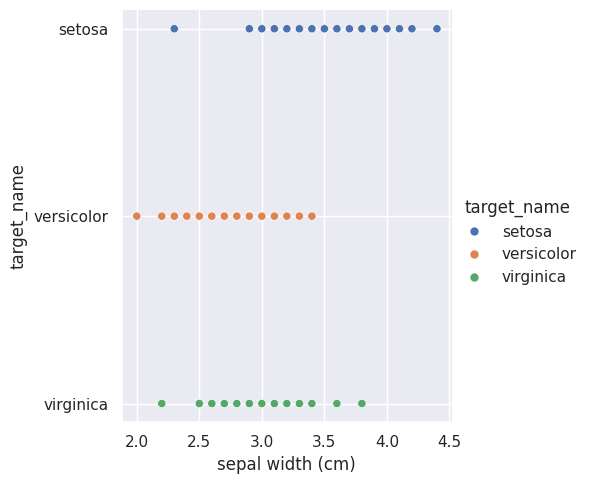

In [ ]:
col = 'sepal width (cm)'
sns.relplot(x = col, y = 'target_name', hue = "target_name", data = df)

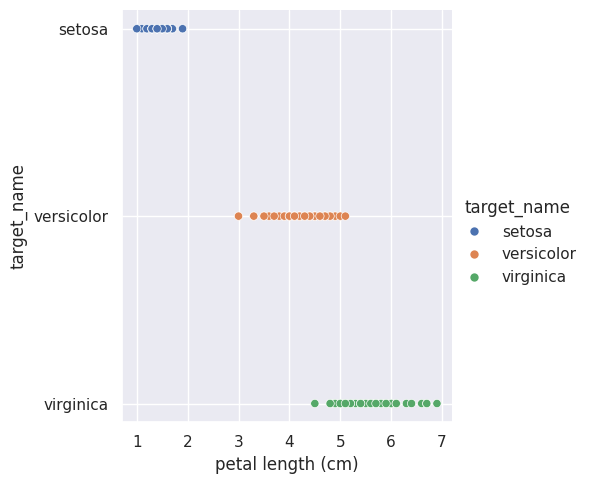

In [ ]:
col = 'petal length (cm)'
sns.relplot(x = col, y = 'target_name', hue = "target_name", data = df)

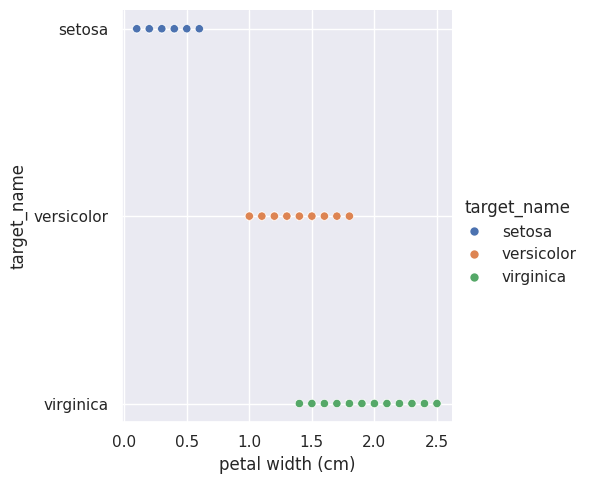

In [ ]:
col = 'petal width (cm)'
sns.relplot(x = col, y = 'target_name', hue = "target_name", data = df)

# EDA With Pairplots

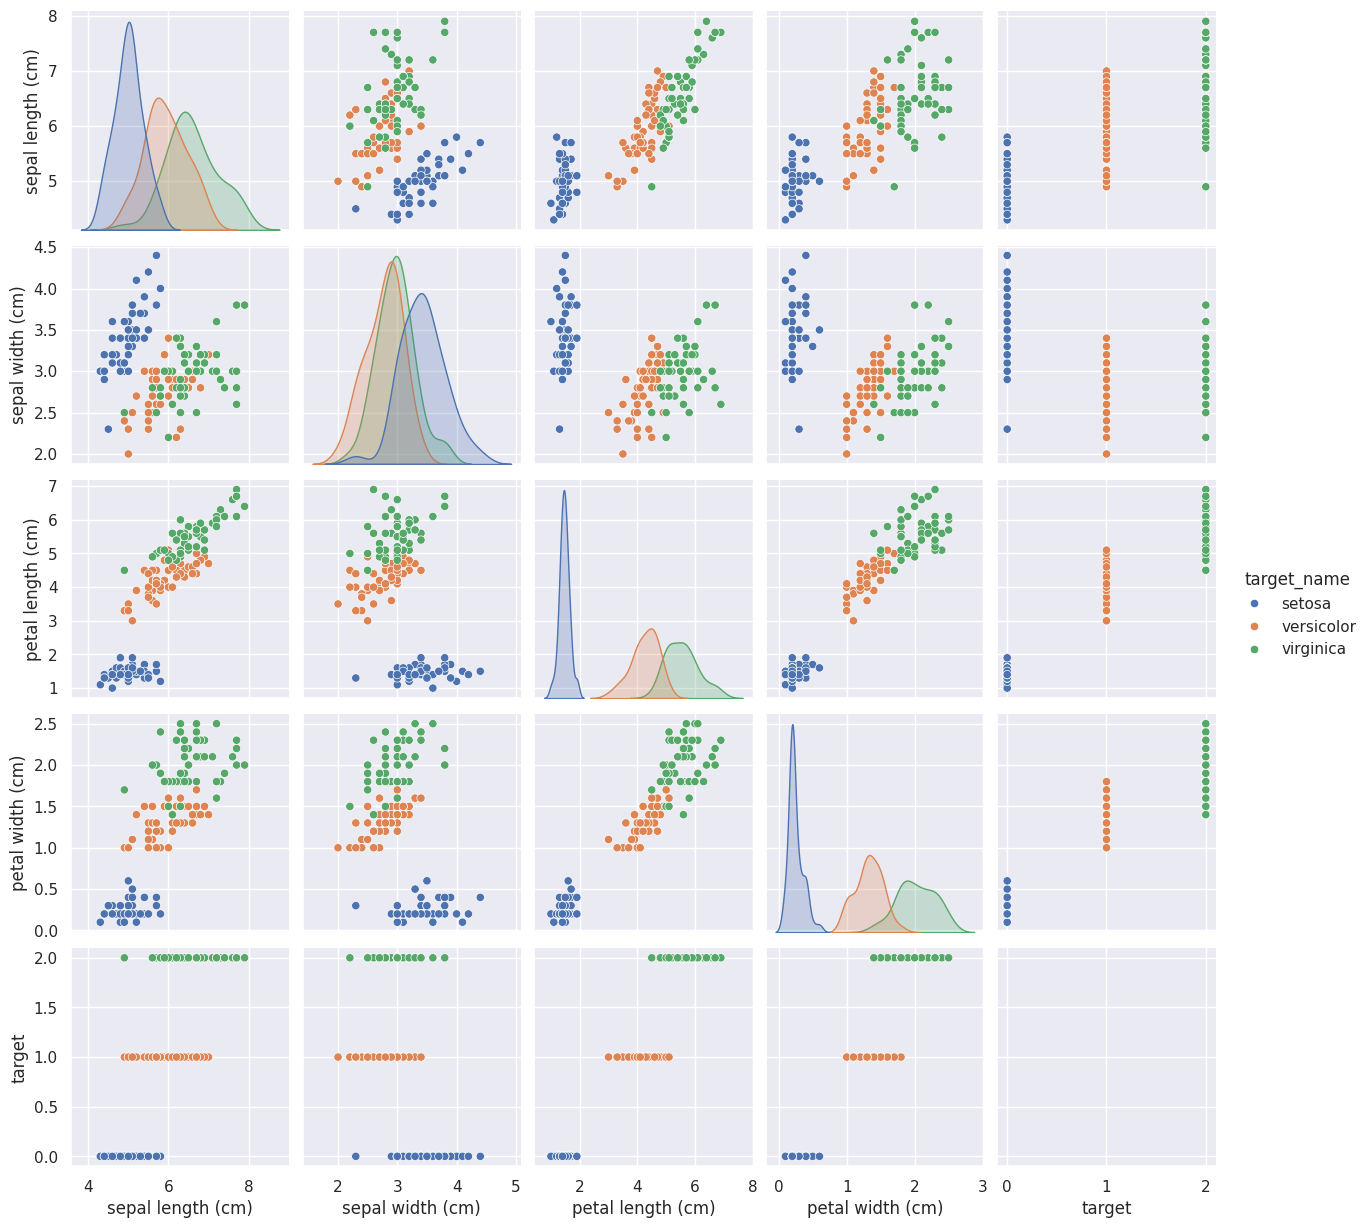

In [ ]:
sns.pairplot(df, hue = 'target_name')

# Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df, test_size = 0.25)

In [ ]:
df_train.shape

(112, 6)

In [ ]:
df_test.shape

(38, 6)

In [ ]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
119,6.0,2.2,5.0,1.5,2,virginica
21,5.1,3.7,1.5,0.4,0,setosa
90,5.5,2.6,4.4,1.2,1,versicolor
115,6.4,3.2,5.3,2.3,2,virginica
61,5.9,3.0,4.2,1.5,1,versicolor


# Prepare our data for modeling
- splitting the data back into numpy arrays

In [ ]:
X_train = df_train.drop(columns = ['target', 'target_name']).values
y_train = df_train['target'].values

In [ ]:
y_train

array([2, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 1, 2, 1, 1,
       1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 1,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0,
       1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1,
       2, 0])

# What is our baseline?
- Simplest model we can make: one that randomly guessing
- Since we only have 3 classes, the accuracy should be around 33%
- Our model should be able to beat that!

In [ ]:
def single_feature_prediction(petal_length):
  '''Returns the species given the petal_length'''
  if petal_length < 2.5:
    return 0
  elif petal_length < 4.8:
    return 1
  else:
    return 2


In [ ]:
X_train[:, 2]

array([5. , 1.5, 4.4, 5.3, 4.2, 4.6, 3.3, 5.1, 3.8, 1.4, 4. , 4.7, 3.9,
       5.6, 4.9, 1.4, 1.3, 5.5, 4.4, 4.8, 4.5, 4.5, 3. , 1.4, 6.7, 1.9,
       5.6, 4.4, 1.7, 5.8, 1.6, 1.4, 5.9, 1.5, 1.3, 4.9, 5.7, 3.9, 4.8,
       4.7, 4.5, 6. , 5.2, 4.7, 5.1, 3.9, 1.6, 5.6, 4.5, 5.6, 6.3, 4.8,
       5.9, 3.3, 5.1, 5.1, 4.9, 5.1, 4.6, 6.1, 1.5, 4. , 4.9, 1.5, 1.5,
       5.1, 1.5, 1.5, 1.4, 1.3, 5.7, 1.6, 3.5, 1.3, 1.4, 1.4, 5.2, 1.5,
       1.4, 1. , 1.2, 3.5, 1.4, 1.4, 1.6, 5.4, 4.2, 1.5, 4.1, 4.3, 4.5,
       5.6, 3.7, 4. , 1.4, 5.5, 6.7, 5.5, 1.3, 5. , 4. , 1.6, 4.2, 4.7,
       4.9, 1.5, 5.4, 4.7, 5.3, 4.8, 5.8, 1.4])

In [ ]:
manual_y_predictions = np.array([single_feature_prediction(val) for val in X_train[:, 2]])

In [ ]:
manual_model_accuracy = np.mean(manual_y_predictions == y_train)

In [ ]:
print(f"Manual model accuracy: {manual_model_accuracy * 100}")

Manual model accuracy: 93.75


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size = 0.25)

In [ ]:
model.fit(Xt, yt)

LogisticRegression()

In [ ]:
y_pred = model.predict(Xv)

In [ ]:
np.mean(y_pred == yv)

0.9642857142857143

In [ ]:
model.score(X_train, y_train)

0.9642857142857143

# Using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
model = LogisticRegression(max_iter = 200)

In [ ]:
accuracies = cross_val_score(model, X_train, y_train, cv = 5, scoring = "accuracy")

In [ ]:
np.mean(accuracies)

0.9553359683794467

In [ ]:
y_pred = cross_val_predict(model, X_train, y_train, cv = 5)

In [ ]:
predicted_correctly_mask = y_pred == y_train

In [ ]:
not_predicted_correctly_mask = ~predicted_correctly_mask

In [ ]:
X_train[not_predicted_correctly_mask]

array([[6. , 2.2, 5. , 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [5.9, 3.2, 4.8, 1.8],
       [6. , 2.7, 5.1, 1.6],
       [6.7, 3. , 5. , 1.7]])

In [ ]:
df_predictions = df_train.copy()

In [ ]:
df_predictions['correct_prediction'] = predicted_correctly_mask

In [ ]:
df_predictions['prediction'] = y_pred

In [ ]:
df_predictions['predition_label'] = df_predictions['prediction'].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [ ]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,predition_label
119,6.0,2.2,5.0,1.5,2,virginica,False,1,versicolor
21,5.1,3.7,1.5,0.4,0,setosa,True,0,setosa
90,5.5,2.6,4.4,1.2,1,versicolor,True,1,versicolor
115,6.4,3.2,5.3,2.3,2,virginica,True,2,virginica
61,5.9,3.0,4.2,1.5,1,versicolor,True,1,versicolor


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

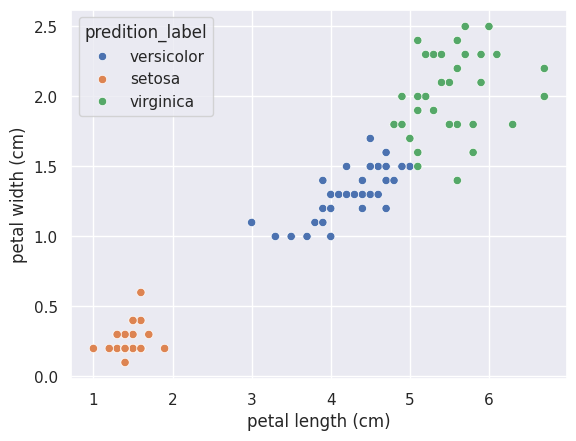

In [ ]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="predition_label", data=df_predictions)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

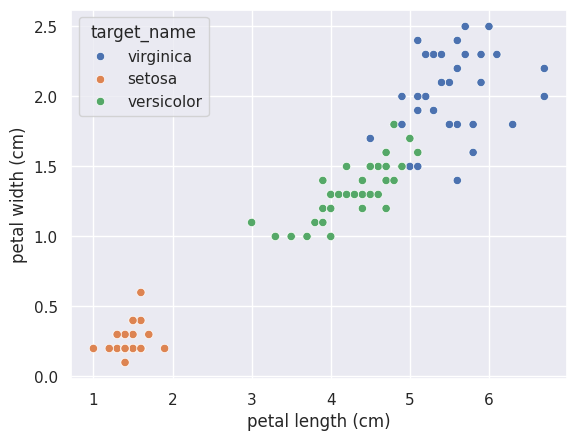

In [ ]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target_name", data=df_predictions)

In [ ]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
  fig, axs = plt.subplots(2, 2, figsize=(10, 10))
  axs = axs.flatten()
  sns.scatterplot(x = x_axis_feature, y = y_axis_feature, hue="predition_label", data=df_predictions, ax=axs[0])
  sns.scatterplot(x = x_axis_feature, y = y_axis_feature, hue="target_name", data=df_predictions, ax=axs[1])
  sns.scatterplot(x = x_axis_feature, y = y_axis_feature, hue="correct_prediction", data=df_predictions, ax=axs[2])

  plt.show()

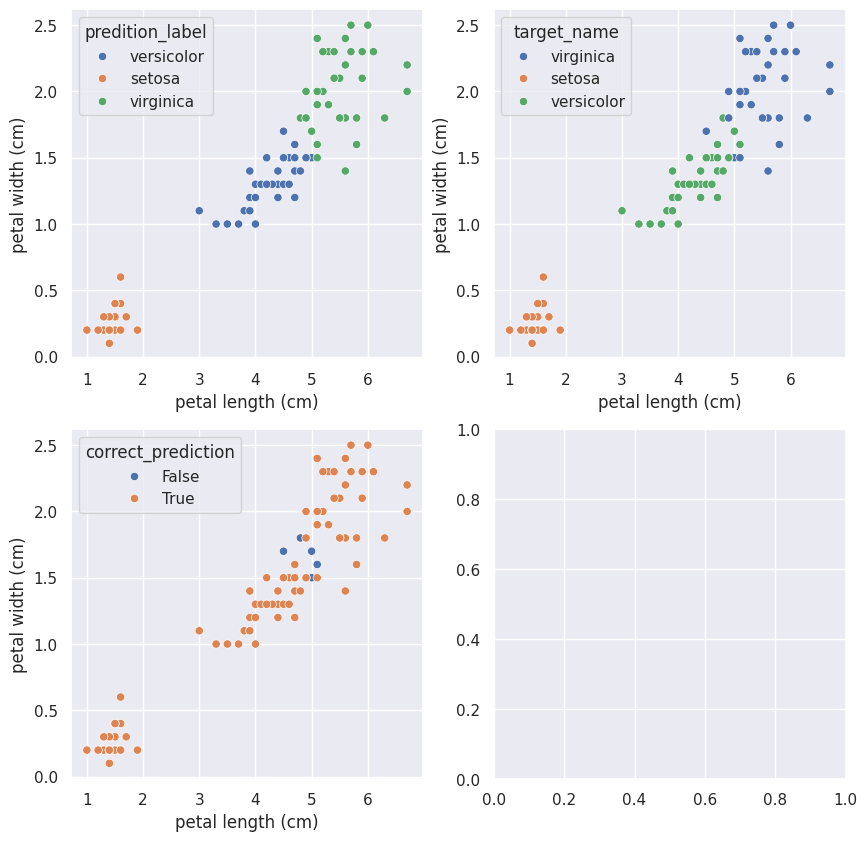

In [ ]:
plot_incorrect_predictions(df_predictions, "petal length (cm)", "petal width (cm)")

In [ ]:
for reg_param in (1, 1.8, 2, 2.3, 2.9, 3):
  print(f"Regularization parameter: {reg_param}")
  model = LogisticRegression(max_iter = 200, C = reg_param)
  accuracies = cross_val_score(model, X_train, y_train, cv = 5, scoring = "accuracy")
  print(f"Accuracy: {np.mean(accuracies) * 100}")

Regularization parameter: 1
Accuracy: 95.53359683794467
Regularization parameter: 1.8
Accuracy: 96.44268774703558
Regularization parameter: 2
Accuracy: 96.44268774703558
Regularization parameter: 2.3
Accuracy: 96.44268774703558
Regularization parameter: 2.9
Accuracy: 96.44268774703558
Regularization parameter: 3
Accuracy: 96.44268774703558


In [ ]:
model = LogisticRegression(max_iter = 200, C = 2)

In [ ]:
X_test = df_test.drop(columns = ['target', 'target_name']).values
y_test = df_test['target'].values

In [ ]:
X_test.shape

(38, 4)

In [ ]:
y_test

array([2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2,
       0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=200)

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [ ]:
print(f"Test set accuracy: {test_set_accuracy * 100}")

Test set accuracy: 100.0


In [ ]:
test_set_correctly_classified

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
df_predictions_test = df_test.copy()
df_predictions_test['correct_prediction'] = test_set_correctly_classified
df_predictions_test['prediction'] = y_test_pred
df_predictions_test['predition_label'] = df_predictions_test['prediction'].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [ ]:
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,predition_label
149,5.9,3.0,5.1,1.8,2,virginica,True,2,virginica
113,5.7,2.5,5.0,2.0,2,virginica,True,2,virginica
124,6.7,3.3,5.7,2.1,2,virginica,True,2,virginica
109,7.2,3.6,6.1,2.5,2,virginica,True,2,virginica
130,7.4,2.8,6.1,1.9,2,virginica,True,2,virginica


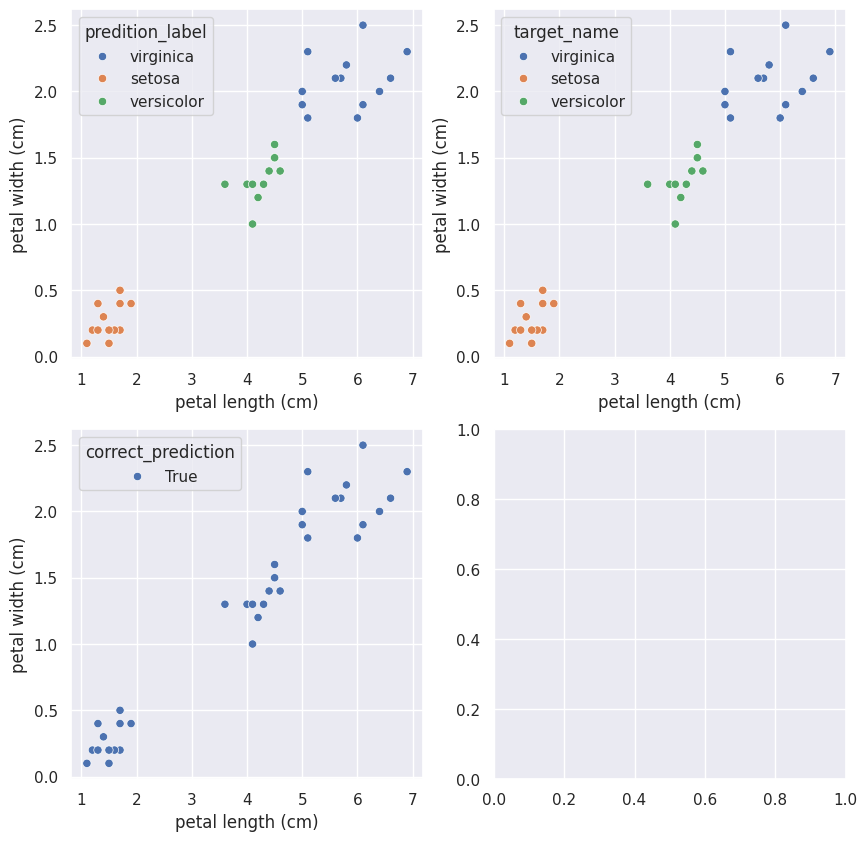

In [ ]:
plot_incorrect_predictions(df_predictions_test, "petal length (cm)", "petal width (cm)")